In [1]:
# Importação de bibliotecas 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [2]:
# Carregamento da base de dados, e visualização da base 
titanic_train = pd.read_csv('titanic_train.csv') 
titanic_test = pd.read_csv('titanic_test.csv') 
titanic_train['train_test']=1
titanic_test['train_test']=0
titanic_test['Survived']=np.NaN
# plt.scatter(base.DESPESAS, base.SITUACAO) 
combined_data=pd.concat([titanic_train,titanic_test])
combined_data.describe() 
combined_data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [3]:
# Tamanho
combined_data.shape

(1309, 13)

In [4]:
# Valores NAN
# Umidade e Vento
combined_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
train_test        0
dtype: int64

In [5]:
# 1014/1309 registros nao tem dado da cabine; logo, melhor nao usar 
# para Embarked e Age, melhor usar respectivamente moda e mediana 

In [6]:
# Embarked 
# Encontrar a moda 
moda = combined_data['Embarked'].mode()
moda[0]

'S'

In [7]:
# Preencher NAs com moda 
combined_data['Embarked'].fillna(moda[0], inplace=True)

In [8]:
# Checar NAs 
combined_data['Embarked'].isnull().sum()

0

In [9]:
# Age 
# Encontrar Mediana 
combined_data['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [10]:
mediana = np.nanmedian(combined_data['Age'])
mediana

28.0

In [11]:
# Substituir NAN por mediana
combined_data['Age'].fillna(mediana, inplace=True)

In [12]:
# Verificar NAN 
combined_data['Age'].isnull().sum()

0

In [13]:
# Colunas interessantes para a analise
colunas = [0, 1, 2, 4, 5, 6, 7, 9, 11, 12] 
combined_data_2 = combined_data.iloc[:, colunas] 
titanic_train_2 = titanic_train.iloc[:, colunas]
combined_data_2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test
0,1,0.0,3,male,22.0,1,0,7.2500,S,1
1,2,1.0,1,female,38.0,1,0,71.2833,C,1
2,3,1.0,3,female,26.0,0,0,7.9250,S,1
3,4,1.0,1,female,35.0,1,0,53.1000,S,1
4,5,0.0,3,male,35.0,0,0,8.0500,S,1


<Axes: xlabel='Survived', ylabel='count'>

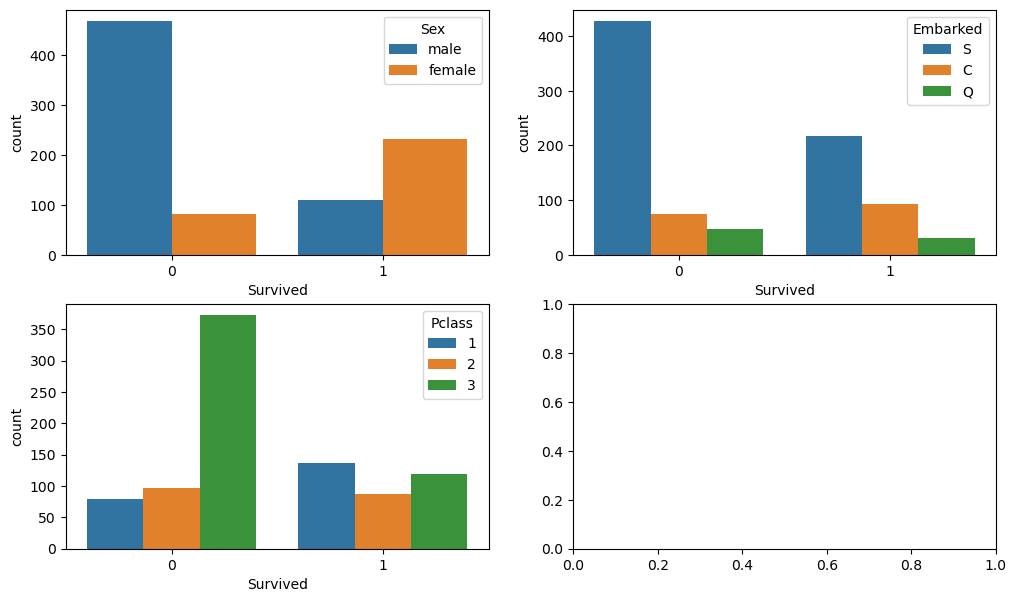

In [14]:
# Check de relacao entre variaveis categoricas e sobrevivencia
fig, axis=plt.subplots(2,2, figsize=(12,7))
sns.countplot(x='Survived', data= titanic_train_2, hue='Sex', ax=axis[0,0])
sns.countplot(x='Survived', data= titanic_train_2, hue='Embarked', ax=axis[0,1])
sns.countplot(x='Survived', data= titanic_train_2, hue='Pclass', ax=axis[1,0]) 
# Sex, Pclass e Embarked tem forte ligacao com sobrevivencia 
# Sex - genero 
# Pclass - classe do bilhete 
# Embarked - Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
# A visualizacao acima demonstra forte ligacao entre as variaveis categoricas e a nao sobrevivencia 

In [ ]:
# Pra simplificar, poderia ter feito isso: 
#numeric = titanic_train_2[['Age','SibSp', 'Parch', 'Fare']]

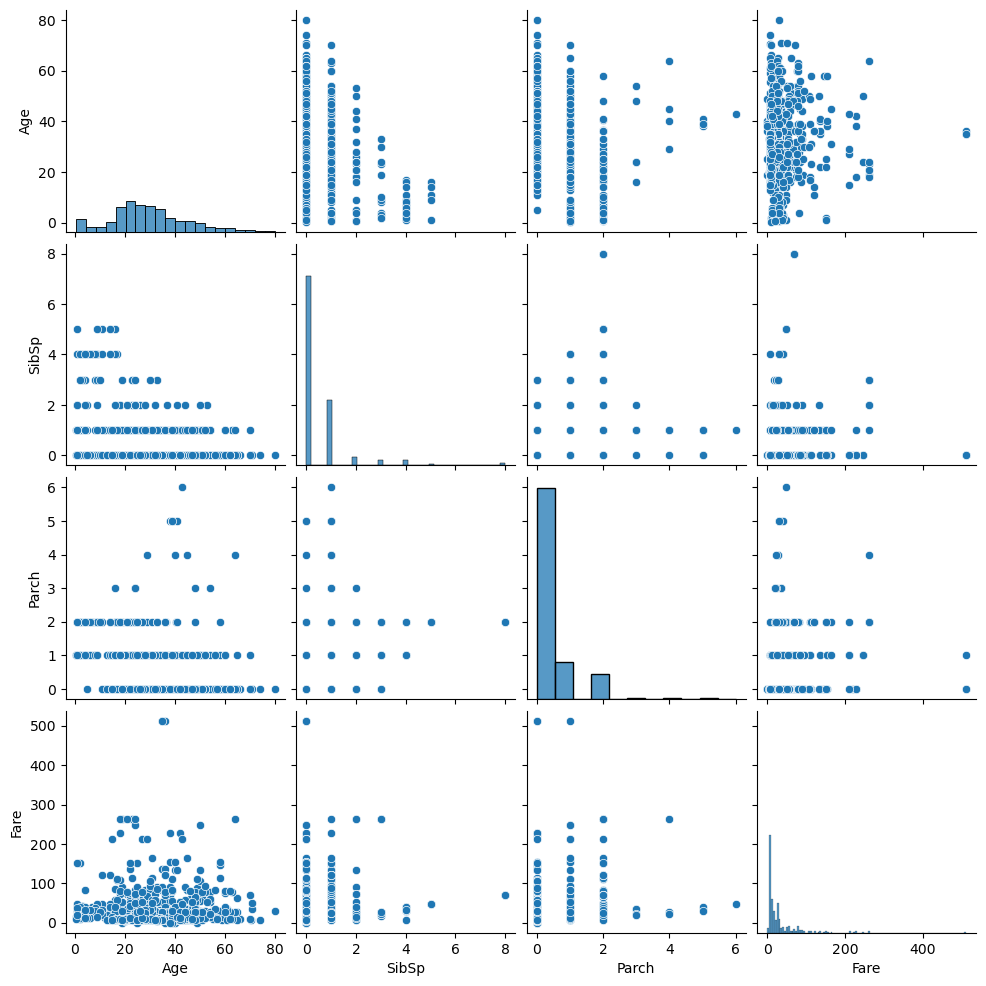

In [15]:
# Check de coorelacao entre variaveis continuas 
sns.pairplot(data=titanic_train_2[['Age','SibSp', 'Parch', 'Fare']]) 
# Age - Idade 
# SibSp - Qtde de irmaos/conjuges abordo 
# Parch - Qtde de pais/criancas abordo 
# Fare - Valor pago na passagem 

In [ ]:
# A visualizacao acima nao parece revelar grande ligacao entre as variaveis continuas 

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

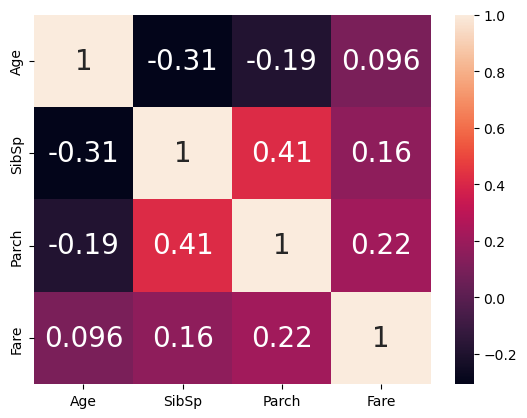

In [16]:
# Check de correlacao entre variaveis continuas 
print(titanic_train_2[['Age','SibSp', 'Parch', 'Fare']].corr())
sns.heatmap(titanic_train_2[['Age','SibSp', 'Parch', 'Fare']].corr(), annot=True, annot_kws={'size':20})

In [ ]:
# A visualizacao acima tambem nao parece revelar grande ligacao entre as variaveis continuas 

In [17]:
# Check de relacao entre media de variaveis continuas e sobrevivencia 
pd.pivot_table(titanic_train_2, index='Survived', values=['Age','SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [ ]:
# Analisando apenas a media, parece haver alguma relacao entre as variaveis continuas e a sobrevivencia 
# Apenas a idade nao parece tao relevante 

In [18]:
# Preparo da tabela para a criacao do modelo 
#dummies = pd.get_dummies(combined_data_2[['PassengerId', 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked', 
dummies = pd.get_dummies(combined_data_2[['PassengerId', 'Pclass','Sex','SibSp','Parch','Fare','Embarked',
                                          'train_test']])

In [19]:
# dummies.head()
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   SibSp        1309 non-null   int64  
 3   Parch        1309 non-null   int64  
 4   Fare         1308 non-null   float64
 5   train_test   1309 non-null   int64  
 6   Sex_female   1309 non-null   uint8  
 7   Sex_male     1309 non-null   uint8  
 8   Embarked_C   1309 non-null   uint8  
 9   Embarked_Q   1309 non-null   uint8  
 10  Embarked_S   1309 non-null   uint8  
dtypes: float64(1), int64(5), uint8(5)
memory usage: 78.0 KB


In [20]:
# Preparo de base sem escalonamento 
X_train = dummies[dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = dummies[dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = combined_data[combined_data.train_test==1].Survived
y_train.shape 

(891,)

In [21]:
# Modelo de Regressao logistica com base sem escalonamento 
lr=LogisticRegression(max_iter=2000)
cv=cross_val_score(lr,X_train,y_train,cv=5)

print(cv)
print(cv.mean()) 

# 0.78676 - com Age 
# 0.78900 - sem Age

[0.78212291 0.79775281 0.78089888 0.7752809  0.80898876]
0.7890088506685078


In [22]:
# Preparo de base com escalonamento 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

dummies_scaled = dummies.copy()
#dummies_scaled[['Age','SibSp','Parch','Fare']]= scale.fit_transform(dummies_scaled[['Age','SibSp','Parch','Fare']])
dummies_scaled[['SibSp','Parch','Fare']]= scale.fit_transform(dummies_scaled[['SibSp','Parch','Fare']])
X_train_scaled = dummies_scaled[dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = dummies_scaled[dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = combined_data[combined_data.train_test==1].Survived 
y_train.shape

(891,)

In [23]:
# Modelo de Regressao logistica com base com escalonamento 

lr=LogisticRegression(max_iter=2000)
cv=cross_val_score(lr,X_train_scaled,y_train,cv=5)

print(cv)
print(cv.mean()) 

# 0.78788 - com Age 
# 0.78340 - sem Age 

[0.77094972 0.79775281 0.78089888 0.76404494 0.80337079]
0.7834034272801456
